In [40]:
import numpy as np
import torch
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping 
import cmath
from torch import nn
import random
from torch.utils import data
import copy

In [41]:
class generator_t:
    def __init__(self,df,mu = 0, sigma = 1,samplesize = 1000, h = 0.01):
        self.df = df
        self.mu = mu
        self.sigma = sigma
        self.samplesize = samplesize
        self.frequency = h
    @staticmethod
    def cumulate(delta):
        data = torch.zeros(np.shape(delta))
        n = np.shape(delta)[0]
        for i in range(n-1):
            data[i+1] = data[i]+delta[i]
        return np.array(data)
    
    def generate_standard_t(self):
        d0 = np.random.standard_t(self.df, (self.samplesize,1))
        d1 = self.cumulate(d0)
        delta = torch.tensor(d0)
        data = torch.tensor(d1)
        delta.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
        return delta,data

In [42]:
class Characteristic_function:
    def __init__(self,data):
        self.data = data   
    def ecf(self,t):
        n = len(self.data)
        if type(t)== int:
            C = torch.zeros((n,1))
            S = torch.zeros((n,1))
            for i in range(n):
                C[i] = math.cos(t*self.data[i])
                S[i] = math.sin(t*self.data[i])
            s = torch.mean(S)
            c = torch.mean(C)
            return c,s                
        else:    
            m = len(t)
            R = []
            for j in range(m):
                S = []
                C = []
                for i in range(n):
                    C = C+[math.cos(t[j]*self.data[i])]
                    S = S+[math.sin(t[j]*self.data[i])]
                #S = torch.tensor(S,dtype = torch.float64)
                #C = torch.tensor(C,dtype = torch.float64)
                s = sum(S)/len(S)
                c = sum(C)/len(C)
                R = R+[c]
                R = R+[s]
            #R = torch.tensor(R,dtype = torch.float64)
        return R

In [43]:
class Characteristic_function:
    def __init__(self,data):
        self.data = data   
    def ecf(self,t):
        n = len(self.data)
        if type(t)== int:
            C = torch.zeros((n,1))
            S = torch.zeros((n,1))
            for i in range(n):
                C[i] = math.cos(t*self.data[i])
                S[i] = math.sin(t*self.data[i])
            s = torch.mean(S)
            c = torch.mean(C)
            return c,s                
        else:    
            m = len(t)
            R = []
            for j in range(m):
                S = []
                C = []
                for i in range(n):
                    C.append(math.cos(t[j]*self.data[i]))
                    S.append(math.sin(t[j]*self.data[i]))
                S = torch.tensor(S,dtype = torch.float64)
                C = torch.tensor(C,dtype = torch.float64)
                s = float(torch.mean(S))
                c = float(torch.mean(C))
                R.append(c)
                R.append(s)
            R = torch.tensor(R,dtype = torch.float64)
        return R
    def ecf_h(self,t,h):
        n = len(self.data)
        if type(t)== int:
            C = torch.zeros((n,1))
            S = torch.zeros((n,1))
            for i in range(n):
                C[i] = math.cos(t*self.data[i])
                S[i] = math.sin(t*self.data[i])
            s = torch.mean(S)
            c = torch.mean(C)
            f = complex(c,s)
            q,w = cmath.polar(f)
            q = q**h
            w = w*h
            c = math.cos(w)*q
            s = math.sin(w)*q
            return c,s                
        else:    
            m = len(t)
            C = torch.zeros((n,1))
            S = torch.zeros((n,1))
            R = torch.zeros((m,2))
            for j in range(m):
                for i in range(n):
                    C[i] = math.cos(t[j]*self.data[i])
                    S[i] = math.sin(t[j]*self.data[i])
                s = torch.mean(S)
                c = torch.mean(C)
                f = complex(c,s)
                q,w = cmath.polar(f)
                q = q**h
                w = w*h
                c = math.cos(w)*q
                s = math.sin(w)*q
                R[j,0] = c
                R[j,1] = s
        return R


In [44]:
num_feature = 200
range_feature = 20
num_t = 50
range_t = 15
num_labels = num_t
num_sample = 15
total = num_sample*num_feature
t = torch.linspace(-range_t,range_t,num_t,dtype = torch.float64)
#t = t.reshape((-1,len(t)))
x = torch.linspace(-range_feature,range_feature,num_feature,dtype = torch.float64)

In [45]:
#实例化(V =3)
Gen3 = generator_t(3,samplesize =total)

delta,path = Gen3.generate_standard_t()
Chf = Characteristic_function(delta)

In [46]:
a = []
features = []
label = []
for i in range(num_sample):
    delta,path = Gen3.generate_standard_t()
    Chf = Characteristic_function(delta)
    labels = Chf.ecf(t)
    label+=labels
    features+=x


In [47]:
(list(real_h))

[tensor(0.0893, grad_fn=<UnbindBackward0>),
 tensor(0.0951, grad_fn=<UnbindBackward0>),
 tensor(0.0976, grad_fn=<UnbindBackward0>),
 tensor(0.0962, grad_fn=<UnbindBackward0>),
 tensor(0.0978, grad_fn=<UnbindBackward0>),
 tensor(0.1034, grad_fn=<UnbindBackward0>),
 tensor(0.0979, grad_fn=<UnbindBackward0>),
 tensor(0.0947, grad_fn=<UnbindBackward0>),
 tensor(0.0979, grad_fn=<UnbindBackward0>),
 tensor(0.0988, grad_fn=<UnbindBackward0>),
 tensor(0.0983, grad_fn=<UnbindBackward0>),
 tensor(0.0961, grad_fn=<UnbindBackward0>),
 tensor(0.1037, grad_fn=<UnbindBackward0>),
 tensor(0.0988, grad_fn=<UnbindBackward0>),
 tensor(0.0940, grad_fn=<UnbindBackward0>),
 tensor(0.0938, grad_fn=<UnbindBackward0>),
 tensor(0.0986, grad_fn=<UnbindBackward0>),
 tensor(0.0924, grad_fn=<UnbindBackward0>),
 tensor(0.0916, grad_fn=<UnbindBackward0>),
 tensor(0.0889, grad_fn=<UnbindBackward0>),
 tensor(0.0915, grad_fn=<UnbindBackward0>),
 tensor(0.0944, grad_fn=<UnbindBackward0>),
 tensor(0.1008, grad_fn=<UnbindB

In [48]:
labels = torch.tensor(label,dtype = torch.float64).reshape((-1,2*num_labels))
features = torch.tensor(features,dtype = torch.float64).reshape((-1,num_feature))
features

tensor([[-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        ...,
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000]],
       dtype=torch.float64)

for i in range(num_sample):
    delta,path = Gen3.generate_standard_t()
    Chf = Characteristic_function(delta)
    labels = Chf.ecf(t)#.reshape((1,-1))
    a.append([x.reshape((-1,len(x))),labels])
    features.append(x.reshape((-1,len(x))))
    label.append(labels)

In [49]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 1
D_loader = load_array((features,labels), batch_size)

In [50]:
next(iter(D_loader)) 

[tensor([[-20.0000, -19.7990, -19.5980, -19.3970, -19.1960, -18.9950, -18.7940,
          -18.5930, -18.3920, -18.1910, -17.9899, -17.7889, -17.5879, -17.3869,
          -17.1859, -16.9849, -16.7839, -16.5829, -16.3819, -16.1809, -15.9799,
          -15.7789, -15.5779, -15.3769, -15.1759, -14.9749, -14.7739, -14.5729,
          -14.3719, -14.1709, -13.9698, -13.7688, -13.5678, -13.3668, -13.1658,
          -12.9648, -12.7638, -12.5628, -12.3618, -12.1608, -11.9598, -11.7588,
          -11.5578, -11.3568, -11.1558, -10.9548, -10.7538, -10.5528, -10.3518,
          -10.1508,  -9.9497,  -9.7487,  -9.5477,  -9.3467,  -9.1457,  -8.9447,
           -8.7437,  -8.5427,  -8.3417,  -8.1407,  -7.9397,  -7.7387,  -7.5377,
           -7.3367,  -7.1357,  -6.9347,  -6.7337,  -6.5327,  -6.3317,  -6.1307,
           -5.9296,  -5.7286,  -5.5276,  -5.3266,  -5.1256,  -4.9246,  -4.7236,
           -4.5226,  -4.3216,  -4.1206,  -3.9196,  -3.7186,  -3.5176,  -3.3166,
           -3.1156,  -2.9146,  -2.7136, 

In [51]:
# 初始化参数定义


hidden_2, hidden_3 = 256, 256

W1 = nn.Parameter(torch.randn(
    num_feature, hidden_2, requires_grad=True,dtype = torch.float64) * 0.01)
b1 = nn.Parameter(torch.zeros(hidden_2, requires_grad=True,dtype = torch.float64))

W2 = nn.Parameter(torch.randn(
    hidden_2, hidden_3, requires_grad=True,dtype = torch.float64) * 0.01)
b2 = nn.Parameter(torch.zeros(hidden_3, requires_grad=True,dtype = torch.float64))

W3 = nn.Parameter(torch.randn(
    hidden_3, num_feature, requires_grad=True,dtype = torch.float64) * 0.01)
b3 = nn.Parameter(torch.zeros(num_feature, requires_grad=True,dtype = torch.float64))


params = [W1, b1, W2, b2, W3, b3]

In [52]:
#激活函数
def relu(X):
    a = torch.zeros_like(X)
    b = torch.max(X, a)
    return torch.tensor(b,dtype = torch.float64)

In [53]:
features.reshape((-1, num_feature))

tensor([[-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        ...,
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000],
        [-20.0000, -19.7990, -19.5980,  ...,  19.5980,  19.7990,  20.0000]],
       dtype=torch.float64)

In [54]:
def expcostx(x,V):
    a = t.reshape((-1,1))@x.reshape((1,-1))
    b = (torch.cos(a)-1)@V.reshape((-1,1))
    c = torch.exp((range_feature*2/num_feature)*b)
    return c
def I(x):
    y = copy.deepcopy(x)
    y[abs(x)>1]=0
    return y
    
def realtx(x,V):
    a1 = torch.sin(t.reshape((-1,1))@x.reshape((1,-1))) 
    a2 = t.reshape((-1,1))@I(x).reshape((1,-1))
    a3 = a1+a2
    a4 = a3@V.reshape((-1,1))
    a5 = (range_feature*2/num_feature)*a4
    a6 = torch.cos(a5)
    return a6
def imagetx(x,V):
    a1 = torch.sin(t.reshape((-1,1))@x.reshape((1,-1))) 
    a2 = t.reshape((-1,1))@I(x).reshape((1,-1))
    a3 = a1+a2
    a4 = a3@V.reshape((-1,1))
    a5 = (range_feature*2/num_feature)*a4
    a6 = torch.sin(a5)
    return a6

In [55]:
def net_1(X):
    X_clone = X.clone()
    X = X.reshape((-1, num_feature))
    H1 = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    H2 = relu(H1@W2 + b2)
    V = (H2@W3 + b3)
    R_1 = expcostx(X,V)*realtx(x,V)
    R_2 = expcostx(X,V)*imagetx(x,V)
    R = torch.cat((R_1,R_2),1).reshape((1,-1))
    return R


In [56]:
H0 =  features[0].reshape((-1, num_feature))
H1 = relu(H0@W1 + b1)
H2 = relu(H1@W2 + b2)
V = (H2@W3 + b3)
a = t.reshape((-1,1))@features[0].reshape((-1,num_feature))


/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


In [57]:
loss = nn.MSELoss()

In [58]:
loss(net_1(features[0]),labels[0])

/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)
/Users/lishuaiyu/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([1, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.4987, dtype=torch.float64, grad_fn=<MseLossBackward0>)

In [59]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [60]:
lr = 0.03
num_epochs = int(num_sample/batch_size)
net = net_1
loss = nn.MSELoss()

trainer = torch.optim.SGD(params, lr=0.03)

In [61]:
for epoch in range(num_epochs):
    for X, y in D_loader:
        l = loss(net_1(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(X), y)
    print(f'epoch {epoch + 1}, loss {l:f}')

/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


epoch 1, loss 0.024180
epoch 2, loss 0.021343
epoch 3, loss 0.020677
epoch 4, loss 0.020564
epoch 5, loss 0.020176
epoch 6, loss 0.019312
epoch 7, loss 0.019689
epoch 8, loss 0.019794
epoch 9, loss 0.018805
epoch 10, loss 0.018589
epoch 11, loss 0.018125
epoch 12, loss 0.017959
epoch 13, loss 0.018206
epoch 14, loss 0.017730
epoch 15, loss 0.017017


In [62]:

labels[0]

real = torch.zeros(int(len(labels[0])/2)+1)
image = torch.zeros(int(len(labels[0])/2)+1)
for i in range(len(labels[0])):
    if i%2 ==0:
        real[int(i/2)] = labels[0][i]
    else:
        image[int((i+1)/2)] = labels[0][i]
        


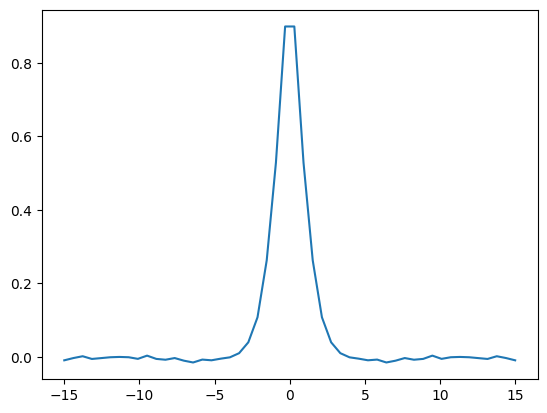

In [63]:
real = real[0:50]
plt.plot(t,real)

In [64]:
predict0 = list(net_1(features[0]))

/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


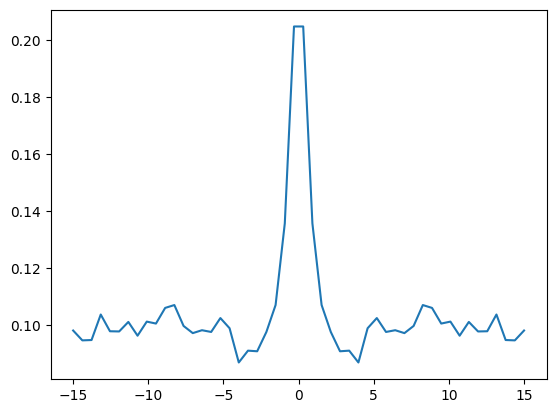

In [65]:
predict0 = list(net_1(features[0]))
real_h = torch.zeros(int(len(labels[0])/2)+1)
image_h = torch.zeros(int(len(labels[0])/2)+1)
for i in range(len(labels[0])):
    if i%2 ==0:
        real_h[int(i/2)] = predict0[0][i]
    else:
        image_h[int((i+1)/2)] = predict0[0][i]
real_h = real_h[0:50]        
plt.plot(t,real_h.detach().numpy())

In [66]:
def net_2(X):
    X_clone = X.clone()
    X = X.reshape((-1, num_feature))
    H1 = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    H2 = relu(H1@W2 + b2)
    V = (H2@W3 + b3)
    return V

In [67]:
net_2(features[0])

/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


tensor([[ 0.1110,  0.1365,  0.1624,  0.1120,  0.0733,  0.0887,  0.0920,  0.0895,
          0.0543,  0.0970,  0.0582,  0.0737,  0.0472,  0.0362,  0.0583,  0.0586,
          0.0578,  0.0642,  0.0677,  0.0401,  0.0372,  0.0590,  0.0688,  0.0946,
          0.0551,  0.0651,  0.0646,  0.0677,  0.0565,  0.0273,  0.0181,  0.0514,
          0.0770,  0.0408,  0.0415,  0.0458,  0.0557,  0.0472,  0.0338,  0.0263,
          0.0718, -0.0060,  0.0015,  0.0136,  0.0100, -0.0155,  0.0128, -0.0680,
          0.0362,  0.0885, -0.0578,  0.0133, -0.0016,  0.0078, -0.0177,  0.0086,
          0.0054,  0.0395,  0.0424,  0.0264,  0.0305,  0.0059,  0.0493,  0.0372,
          0.0350,  0.0462,  0.0594,  0.0519,  0.0304,  0.0907,  0.0600,  0.0823,
          0.1036,  0.0206,  0.0969,  0.0811,  0.0092,  0.0526,  0.0586,  0.0528,
          0.0299,  0.0614,  0.0549,  0.0792,  0.0240,  0.0644,  0.0979,  0.0861,
          0.1119,  0.0682,  0.0711,  0.0496,  0.0761,  0.0740,  0.1088,  0.0948,
          0.1575,  0.1089,  

/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


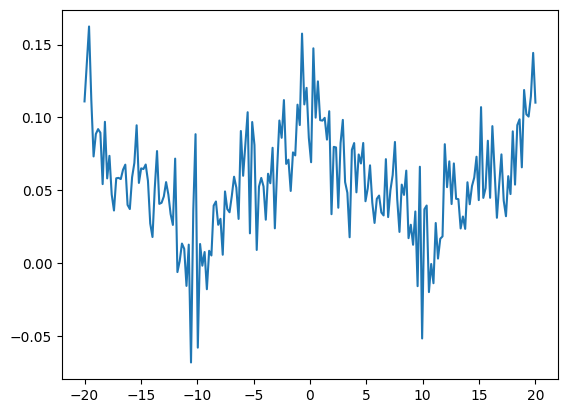

In [68]:
plt.plot(features[0],net_2(features[0]).detach().numpy().reshape(features[0].shape))

In [69]:
T = torch.linspace(-2*range_t,2*range_t,4*num_t,dtype = torch.float64)

In [71]:
def expcostxT(x,V):
    a = T.reshape((-1,1))@x.reshape((1,-1))
    b = (torch.cos(a)-1)@V.reshape((-1,1))
    c = torch.exp((range_feature*2/num_feature)*b)
    return c
def I(x):
    y = copy.deepcopy(x)
    y[abs(x)>1]=0
    return y
    
def realtxT(x,V):
    a1 = torch.sin(T.reshape((-1,1))@x.reshape((1,-1))) 
    a2 = T.reshape((-1,1))@I(x).reshape((1,-1))
    a3 = a1+a2
    a4 = a3@V.reshape((-1,1))
    a5 = (range_feature*2/num_feature)*a4
    a6 = torch.cos(a5)
    return a6
def imagetxT(x,V):
    a1 = torch.sin(T.reshape((-1,1))@x.reshape((1,-1))) 
    a2 = T.reshape((-1,1))@I(x).reshape((1,-1))
    a3 = a1+a2
    a4 = a3@V.reshape((-1,1))
    a5 = (range_feature*2/num_feature)*a4
    a6 = torch.sin(a5)
    return a6

In [73]:
def net_3(X):
    X_clone = X.clone()
    X = X.reshape((-1, num_feature))
    H1 = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    H2 = relu(H1@W2 + b2)
    V = (H2@W3 + b3)
    R_1 = expcostxT(X,V)*realtxT(x,V)
    R_2 = expcostxT(X,V)*imagetxT(x,V)
    R = torch.cat((R_1,R_2),1).reshape((1,-1))
    return R

In [74]:
net_3(features[0])

/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


tensor([[ 9.3916e-02,  1.4239e-02,  9.1926e-02,  1.0225e-02,  1.1474e-01,
          6.2280e-03,  1.1084e-01,  8.4286e-03,  1.0211e-01,  1.6538e-02,
          1.2099e-01,  8.8730e-03,  1.1064e-01,  1.1871e-02,  1.2072e-01,
          1.8005e-02,  1.1668e-01,  1.0969e-02,  1.2695e-01,  1.6264e-02,
          1.1313e-01,  1.0432e-02,  1.0992e-01,  1.0709e-02,  1.0906e-01,
          6.9125e-03,  1.0511e-01,  7.0521e-03,  1.0825e-01,  7.7611e-03,
          1.0820e-01,  1.7471e-02,  1.0113e-01,  1.0607e-02,  1.0787e-01,
          6.5873e-03,  9.6578e-02,  4.0446e-03,  1.0703e-01,  7.9087e-03,
          9.5001e-02,  1.3894e-03,  1.1082e-01,  1.1743e-02,  1.0231e-01,
          9.8051e-03,  1.0515e-01,  1.1278e-02,  9.6211e-02,  2.2009e-03,
          1.0592e-01,  1.1105e-02,  1.0320e-01,  9.3367e-03,  1.0952e-01,
          1.5926e-02,  1.1072e-01,  2.7425e-03,  1.0502e-01,  1.0298e-02,
          1.0357e-01,  1.0621e-02,  1.1396e-01,  1.4781e-02,  1.0767e-01,
         -4.2439e-03,  1.0053e-01,  8.

/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


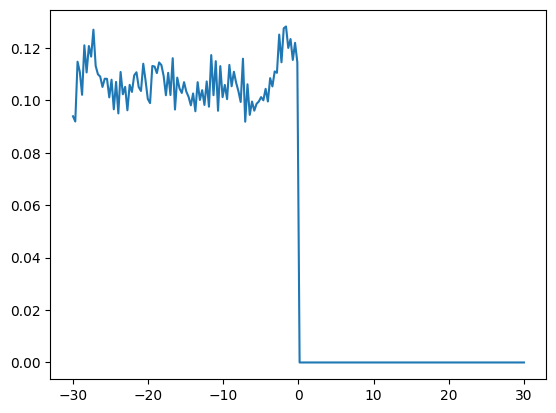

In [86]:
predict1 = list(net_3(features[0]))
real_T = torch.zeros(int(len(T)))
image_T = torch.zeros(int(len(T)))
for i in range(len(T)):
    if i%2 ==0:
        real_T[int(i/2)] = predict1[0][i]
    else:
        image_T[int((i+1)/2)] = predict1[0][i]
real_T = real_T[0:len(T)]        
plt.plot(T,real_T.detach().numpy())

In [79]:
len(T)

200

In [80]:
net_3(features[0]).shape

/var/folders/ym/35040q6j5x912qskn704_hy80000gn/T/ipykernel_96530/2169779723.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(b,dtype = torch.float64)


torch.Size([1, 400])

In [85]:
real_T = torch.zeros(int(len(T)/2)+1)
real_T.shape

torch.Size([101])